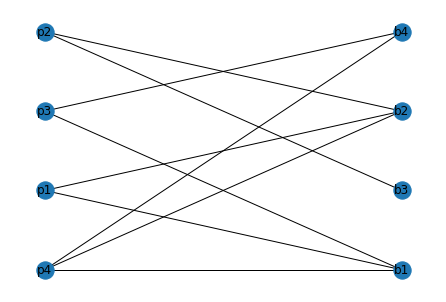

In [2]:
import networkx as nx
#Point A
G1 = nx.Graph() 
G1.add_nodes_from(['p1','p2','p3','p4','b1','b2','b3','b4'])
G1.add_edges_from([('p1','b1'),('p1','b2'),('p2','b2'),('p2','b3'),('p3','b1'),('p3','b4'),('p4','b1'),('p4','b2'),('p4','b4')])

X, Y = nx.bipartite.sets(G1)
pos = dict()
#at x=1 we have persons
pos.update((n, (1, i)) for i, n in enumerate(X))
#at x=2 we have books
pos.update((n, (2, i)) for i, n in enumerate(Y))

nx.draw(G1, pos = pos, with_labels = True)

In [3]:
#create the directed graph
G = nx.DiGraph() 
G.add_nodes_from(['p1','p2','p3','p4','b1','b2','b3','b4'])
G.add_edges_from([('p1','b1'),('p1','b2'),('p2','b2'),('p2','b3'),('p3','b1'),('p3','b4'),('p4','b1'),('p4','b2'),('p4','b4')])

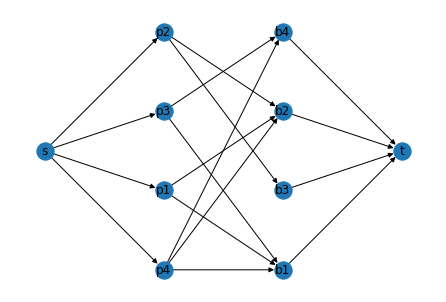

In [4]:
#reconduct the problem to a single source and sink, adding 's' and 't' nodes. Then add edges from 's'
#to every source of the original network and from 't' to every sink of the original network. 
G.add_edges_from([('s','p1'),('s','p2'),('s','p3'),('s','p4'),('b1','t'),('b2','t'),('b3','t'),('b4','t')])

pos.update( {'s': (0, 1.5)} )
pos.update( {'t': (3, 1.5)} )

nx.draw(G, pos=pos, with_labels=True)

In [5]:
#Point B
#each person can only take one book and only one copy of each book is available
G['p3']['b1']['capacity'] = 1
G['p3']['b4']['capacity'] = 1
G['p4']['b1']['capacity'] = 1
G['p4']['b4']['capacity'] = 1
G['p4']['b2']['capacity'] = 1
G['p2']['b3']['capacity'] = 1
G['p2']['b2']['capacity'] = 1
G['p1']['b1']['capacity'] = 1
G['p1']['b2']['capacity'] = 1
G['s']['p1']['capacity'] = 1
G['s']['p2']['capacity'] = 1
G['s']['p3']['capacity'] = 1
G['s']['p4']['capacity'] = 1
G['b1']['t']['capacity'] = 1
G['b2']['t']['capacity'] = 1
G['b3']['t']['capacity'] = 1
G['b4']['t']['capacity'] = 1

In [6]:
#compute maximum flow
nx.algorithms.flow.maximum_flow(G, 's', 't')

(4,
 {'p1': {'b1': 0, 'b2': 1},
  'p2': {'b2': 0, 'b3': 1},
  'p3': {'b1': 1, 'b4': 0},
  'p4': {'b1': 0, 'b2': 0, 'b4': 1},
  'b1': {'t': 1},
  'b2': {'t': 1},
  'b3': {'t': 1},
  'b4': {'t': 1},
  's': {'p1': 1, 'p2': 1, 'p3': 1, 'p4': 1},
  't': {}})

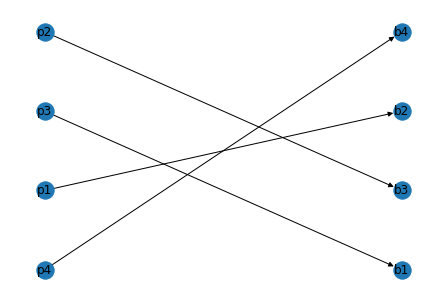

In [7]:
Gb = nx.DiGraph()
Gb.add_edges_from([('p1','b2'),('p2','b3'),('p3','b1'),('p4','b4')])
nx.draw(Gb,pos,with_labels = True)

In [8]:
#compute minimum cut
nx.algorithms.flow.minimum_cut(G, 's', 't')

(4, ({'b1', 'b2', 'b3', 'b4', 'p1', 'p2', 'p3', 'p4', 's'}, {'t'}))

In [9]:
#Point C
#increase capacities from s to each person, to allow people to pick more than one book
#the capacity of the edges leading to the sink (t) is the number of copies of the book 
G['p3']['b1']['capacity'] = 1
G['p3']['b4']['capacity'] = 1
G['p4']['b1']['capacity'] = 1
G['p4']['b4']['capacity'] = 1
G['p4']['b2']['capacity'] = 1
G['p2']['b3']['capacity'] = 1
G['p2']['b2']['capacity'] = 1
G['p1']['b1']['capacity'] = 1
G['p1']['b2']['capacity'] = 1
#how many different books each person can take
G['s']['p1']['capacity'] = 4
G['s']['p2']['capacity'] = 4
G['s']['p3']['capacity'] = 4
G['s']['p4']['capacity'] = 4
#how many books are there
G['b1']['t']['capacity'] = 2
G['b2']['t']['capacity'] = 3
G['b3']['t']['capacity'] = 2
G['b4']['t']['capacity'] = 2

In [10]:
#compute maximum flow
nx.algorithms.flow.maximum_flow(G, 's', 't')

(8,
 {'p1': {'b1': 0, 'b2': 1},
  'p2': {'b2': 1, 'b3': 1},
  'p3': {'b1': 1, 'b4': 1},
  'p4': {'b1': 1, 'b2': 1, 'b4': 1},
  'b1': {'t': 2},
  'b2': {'t': 3},
  'b3': {'t': 1},
  'b4': {'t': 2},
  's': {'p1': 1, 'p2': 2, 'p3': 2, 'p4': 3},
  't': {}})

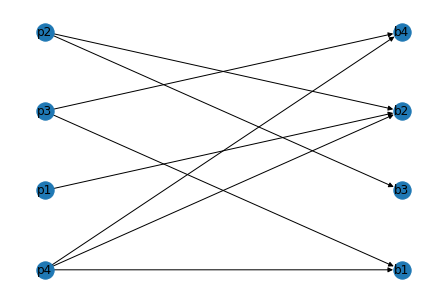

In [11]:
#result
Gc = nx.DiGraph()
Gc.add_edges_from([('p1', 'b2'), ('p2', 'b2'), ('p2', 'b3'), ('p3', 'b4'), ('p3', 'b1'), ('p4', 'b4'), ('p4', 'b1'), ('p4', 'b2')])
nx.draw(Gc, pos, with_labels = True)

In [12]:
#Point D
#library should sell one copy of b3 to buy one of b1
G['p3']['b1']['capacity'] = 1
G['p3']['b4']['capacity'] = 1
G['p4']['b1']['capacity'] = 1
G['p4']['b4']['capacity'] = 1
G['p4']['b2']['capacity'] = 1
G['p2']['b3']['capacity'] = 1
G['p2']['b2']['capacity'] = 1
G['p1']['b1']['capacity'] = 1
G['p1']['b2']['capacity'] = 1 
G['s']['p1']['capacity'] = 4
G['s']['p2']['capacity'] = 4
G['s']['p3']['capacity'] = 4
G['s']['p4']['capacity'] = 4
G['b1']['t']['capacity'] = 3
G['b2']['t']['capacity'] = 3
G['b3']['t']['capacity'] = 1
G['b4']['t']['capacity'] = 2

#compute maximum flow
nx.algorithms.flow.maximum_flow(G, 's', 't')

(9,
 {'p1': {'b1': 1, 'b2': 1},
  'p2': {'b2': 1, 'b3': 1},
  'p3': {'b1': 1, 'b4': 1},
  'p4': {'b1': 1, 'b2': 1, 'b4': 1},
  'b1': {'t': 3},
  'b2': {'t': 3},
  'b3': {'t': 1},
  'b4': {'t': 2},
  's': {'p1': 2, 'p2': 2, 'p3': 2, 'p4': 3},
  't': {}})

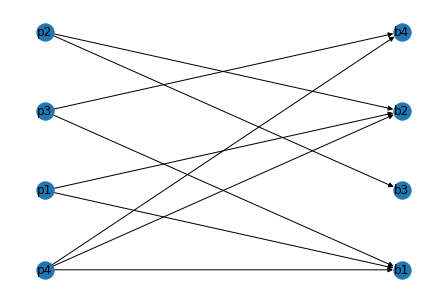

In [13]:
#result
Gd=nx.DiGraph()
Gd.add_edges_from([('p1','b2'),('p1','b1'),('p2','b2'),('p2','b3'),('p3','b4'),('p3','b1'),('p4','b4'),('p4','b1'),('p4','b2')])
nx.draw(Gd, pos, with_labels = True)